<a href="https://colab.research.google.com/github/tarupathak30/Deep-Learning-/blob/main/improving_neural_network/early_stopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [99]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping

In [100]:
x, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

<Axes: >

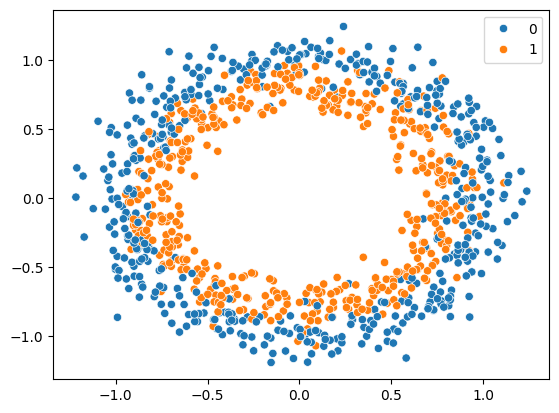

In [101]:
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y)

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [103]:
x.shape

(1000, 2)

In [104]:
model = Sequential([
    Input(shape=(2, )),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [105]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [106]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3500, verbose=0)

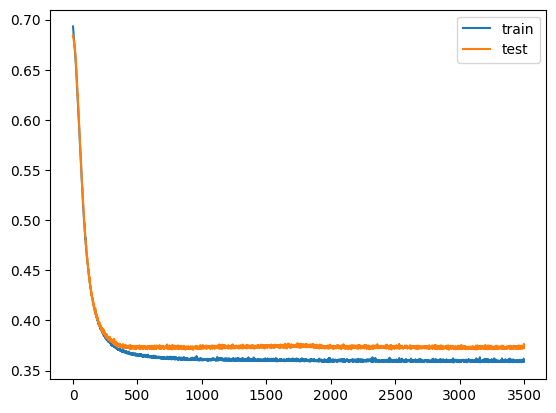

In [107]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


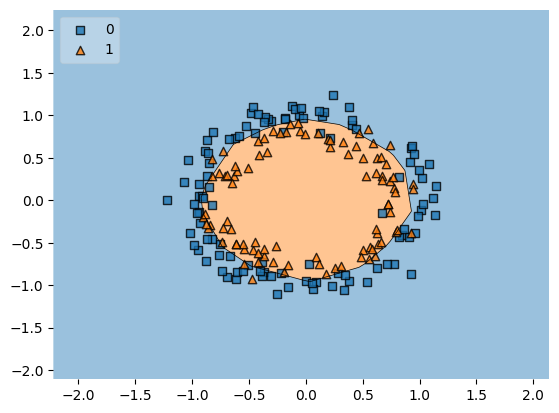

In [108]:
plot_decision_regions(x_test, y_test.ravel(), clf=model, legend=2)
plt.show()

comparison of loss function between test and training data. clearly seen that the model is overfitted as loss function is rising after certain epochs

now, we will use early stopping in order to prevent overfitting.

In [109]:
model = Sequential([
    Input(shape=(2, )),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [110]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [111]:
callback = EarlyStopping(
    monitor='val_loss',
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [112]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3500, callbacks=callback, verbose=0)

Epoch 338: early stopping


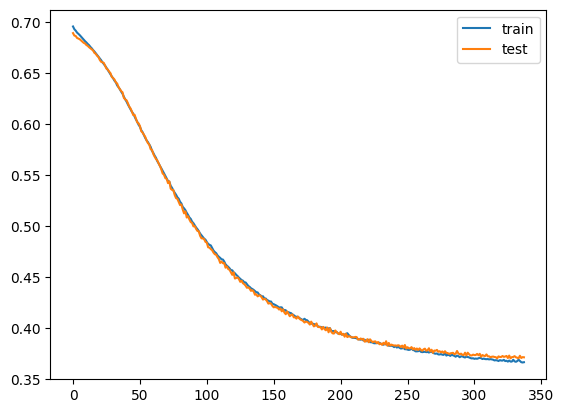

In [113]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()